# Why a custom evaluation?

I don't know how to read evals shared in research papers. They just don't talk to me. Far from my real-world use cases.

So I write a simple task, and test it with the models I like.

And I want to go deep in understanding how good or bad the model behaves for the task with a statistical approach

## Model: DeepSeek-R1-Distill-Llama-8B

Model: [https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-8B](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-8B)

On my machine, i can run it locally, so here we go.

## The Task: ever heard of the Rs in Strawberry?

In [1]:
instruction = "how many R's in strawberry? write the final answer in the format <result>X</result>, where X is a number"

In [4]:
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='deepseek-r1:8b', messages=[
  {
    'role': 'user',
    'content': instruction,
  },
])
print(response['message']['content'])

print(response.message.content)

<think>
Okay, so I need to figure out how many times the letter 'R' appears in the word "strawberry." Hmm, let me start by writing down the word and then examine each letter one by one. The word is spelled S-T-R-A-W-B-E-R-R-Y. Let me count the letters again to make sure I have it right.

Starting from the beginning: S, T, R, A, W, B, E, R, R, Y. Wait, that's 10 letters in total, but let me double-check because sometimes I might miss a letter or miscount. So, S is first, then T, so that's two letters. Next comes R, which is the third letter. Then A, W, B, E—so that's up to the seventh letter. Then another R, making it eight, and another R after that, so that's nine. Finally, Y is the tenth letter. So, in total, there are 10 letters.

Now, focusing on the letter 'R' specifically. Let me go through each position again:

1. S – not an R
2. T – nope
3. R – yes, that's one
4. A – no
5. W – no
6. B – no
7. E – no
8. R – two
9. R – three
10. Y – no

Wait a second, I thought it was nine letters

In [6]:
from rich import print

print(response)

ChatResponse(
    model='deepseek-r1:8b',
    created_at='2025-02-01T16:31:00.20549Z',
    done=True,
    done_reason='stop',
    total_duration=27160637208,
    load_duration=32400000,
    prompt_eval_count=28,
    prompt_eval_duration=596000000,
    eval_count=779,
    eval_duration=26530000000,
    message=Message(
        role='assistant',
        content='<think>\nOkay, so I need to figure out how many times the letter \'R\' appears in the word 
"strawberry." Hmm, let me start by writing down the word and then examine each letter one by one. The word is 
spelled S-T-R-A-W-B-E-R-R-Y. Let me count the letters again to make sure I have it right.\n\nStarting from the 
beginning: S, T, R, A, W, B, E, R, R, Y. Wait, that\'s 10 letters in total, but let me double-check because 
sometimes I might miss a letter or miscount. So, S is first, then T, so that\'s two letters. Next comes R, which is
the third letter. Then A, W, B, E—so that\'s up to the seventh letter. Then another R, making it eight, and another
R after that, so that\'s nine. Finally, Y is the tenth letter. So, in total, there are 10 letters.\n\nNow, focusing
on the letter \'R\' specifically. Let me go through each position again:\n\n1. S – not an R\n2. T – nope\n3. R – 
yes, that\'s one\n4. A – no\n5. W – no\n6. B – no\n7. E – no\n8. R – two\n9. R – three\n10. Y – no\n\nWait a 
second, I thought it was nine letters, but when I count again, maybe I\'m getting confused. Let me write them out 
with their positions:\n\n1. S\n2. T\n3. R (1)\n4. A\n5. W\n6. B\n7. E\n8. R (2)\n9. R (3)\n10. Y\n\nSo that\'s ten 
letters, and \'R\' appears three times: at the third position, eighth, and ninth positions. So, the total number of
\'R\'s is 3.\n\nBut just to be extra sure, maybe I should write out the word again and mark each R as I go:\n\nS T 
R A W B E R R Y\n\nNow, counting the R\'s: after S and T comes R (1), then later there are two more R\'s before the
Y. So yes, that confirms it: three R\'s in total.\n\nI think that\'s correct, but sometimes when words have double 
letters or consonants, it can be tricky. Let me think of another way to verify. Maybe using a different approach, 
like writing the word and circling each R:\n\nS T [R] A W B E [R] [R] Y\n\nThat gives me three circled R\'s. Yep, 
that matches my earlier count.\n\nAnother method: sometimes in words, certain letters are more common. Since 
\'strawberry\' is a common word, I can recall that it has two R\'s at the end before Y. But wait, does it have just
two or three? Let me visualize the spelling again. S-T-R-A-W-B-E-R-R-Y. Oh, so after E comes R and another R. So 
that\'s two R\'s towards the end, making a total of three in the word: one in the middle and two at the end.\n\nSo,
to make sure I\'m not missing any other R\'s elsewhere, but looking through each letter again:\n\n- S\n- T\n- R 
(1)\n- A\n- W\n- B\n- E\n- R (2)\n- R (3)\n- Y\n\nYes, three R\'s. I don\'t think there are more than that. So the 
final count is 3.\n</think>\n\nThe letter \'R\' appears three times in "strawberry."\n\n<result>3</result>',
        images=None,
        tool_calls=None
    )
)

We want to store the results in a JSON file for further data analysis

In [12]:
def store_result_in_db(record: dict, db_file: str = "responses.json") -> None:
    """
    Appends a new record to the 'responses' array in the JSON database file.
    If the file doesn't exist or is empty, it creates a new structure.
    
    Parameters:
        record (dict): A dictionary representing a response record.
        db_file (str): Path to the JSON database file.
    """
    import json  
    from pathlib import Path

    db_path = Path(db_file)
    
    # If the file exists, try to load its content; otherwise start with an empty database
    if db_path.exists():
        try:
            with open(db_path, "r") as f:
                data = json.load(f)
        except (json.JSONDecodeError, IOError):
            data = {}
    else:
        data = {}
    
    # Ensure that there is a responses list in the database
    if "responses" not in data or not isinstance(data["responses"], list):
        data["responses"] = []
    
    # Append the new record
    data["responses"].append(record)
    
    # Write the updated data back to the file
    with open(db_path, "w") as f:
        json.dump(data, f, indent=2)



In [16]:
def run_llm_call_and_store(instruction: str, output_file: str = "responses.json") -> None:
    """
    Runs the LLM call using the given instruction and stores the result in a JSON file.
    """
    # Run the LLM call
    response = chat(model='deepseek-r1:8b', messages=[
        {
            'role': 'user',
            'content': instruction,
        },
    ])
    
    
    record_to_store = {
    "model": response.model,
    "created_at": response.created_at,
    "message": response.message.content,
    "eval_count": response.eval_count,
    "eval_duration": response.eval_duration,
    "total_duration": response.total_duration
    }
    store_result_in_db(record_to_store)


## Loops

LLMs are statistical beasts, we need to evaluate them in that space.

We launch the same task 100 times, and the only thing that we are 100% sure is that they will be all different. That's how they work.

Let's run the loop.

MacBook Pro: 
Chip: Apple M2 Pro
Memory: 16GB
MacOS: 15.1.1


In [19]:
for _ in range(100):
    run_llm_call_and_store(instruction=instruction)

### Execution trail log

It took ~33 minutes to run them all

~94% GPU usage all the time

![deepseek-r1-8b-eval-gpu-usage.png](deepseek-r1-8b-eval-gpu-usage.png)

![deepseek-r1-8b-eval-memory-usage.png](deepseek-r1-8b-eval-memory-usage.png)


## Analysis of the results

We now want to know:
- How many successful results: "<result>3</result>" in the response
- How many unsuccessful results: "<result>X</result> X is anything else than 3
- Distribution of results for unsuccessful attempts
- How many badly structured outputs: doesn't contain "<result>Y</result>"
- Token count distibution for the successful results
- Token count distibution for the unsuccessful results

How many runs do we need to run to statistically say the answer based on the cluster of responses

In [43]:
def analyze_response(response_content: str) -> dict:
    """
    Analyzes a single response for success criteria and token counts.
    
    Returns:
        dict with analysis results including:
        - success: bool
        - result: str (the number found in result tag)
        - is_well_structured: bool
        - token_count: int
    """
    import re
    
    # Check for well-structured output
    result_pattern = r"<result>(\d+)</result>"
    match = re.search(result_pattern, response_content)
    
    analysis = {
        "is_well_structured": bool(match),
        "success": False,
        "result": None,
        "token_count": len(response_content.split())  # Simple word count as proxy
    }
    
    if match:
        result = match.group(1)
        analysis["result"] = result
        analysis["success"] = (result == "3")
    else:
        print(f"bad format: {response_content}")
        
    return analysis

def analyze_results(responses_file: str = "responses.json") -> dict:
    """
    Analyzes all responses in the JSON file and returns statistics.
    """
    import json
    from collections import Counter
    from pathlib import Path
    
    try:
        with open(responses_file, 'r') as f:
            data = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        return {"error": f"Could not load {responses_file}"}
        
    responses = data.get("responses", [])
    
    stats = {
        "total_responses": len(responses),
        "successful_count": 0,
        "unsuccessful_count": 0,
        "badly_structured_count": 0,
        "result_distribution": Counter(),
        "successful_token_counts": [],
        "unsuccessful_token_counts": []
    }
    
    for response in responses:
        analysis = analyze_response(response["message"])
        
        if not analysis["is_well_structured"]:
            stats["badly_structured_count"] += 1
            continue
            
        if analysis["success"]:
            stats["successful_count"] += 1
            stats["successful_token_counts"].append(analysis["token_count"])
        else:
            stats["unsuccessful_count"] += 1
            stats["unsuccessful_token_counts"].append(analysis["token_count"])
            
        if analysis["result"]:
            stats["result_distribution"][analysis["result"]] += 1
            
    return stats

def prepare_report(stats: dict):
    """Prints analysis results in a readable format."""
    markdown_report = ""
    
    def add_to_report(data):
        nonlocal markdown_report
        markdown_report += data

    add_to_report("\nAnalysis Results:\n")
    add_to_report("-" * 50)
    add_to_report(f"\nTotal Responses: {stats['total_responses']}\n")
    add_to_report(f"Successful Results (3): {stats['successful_count']}\n")
    add_to_report(f"Unsuccessful Results: {stats['unsuccessful_count']}\n")
    add_to_report(f"Badly Structured Outputs: {stats['badly_structured_count']}\n")
    
    add_to_report("\nResult Distribution:\n")
    for result, count in stats['result_distribution'].items():
        add_to_report(f"  Result {result}: {count} responses\n")
        
    if stats['successful_token_counts']:
        avg_successful = sum(stats['successful_token_counts']) / len(stats['successful_token_counts'])
        add_to_report(f"\nSuccessful Responses Avg Token Count: {avg_successful:.1f}\n")
        
    if stats['unsuccessful_token_counts']:
        avg_unsuccessful = sum(stats['unsuccessful_token_counts']) / len(stats['unsuccessful_token_counts'])
        add_to_report(f"Unsuccessful Responses Avg Token Count: {avg_unsuccessful:.1f}\n")
    
    return markdown_report


In [41]:

# Add this to run the analysis
stats = analyze_results()
report = prepare_report(stats)


In [42]:

print(report)

Analysis Results:
--------------------------------------------------
Total Responses: 103
Successful Results (3): 85
Unsuccessful Results: 16
Badly Structured Outputs: 2

Result Distribution:
  Result 3: 85 responses
  Result 2: 16 responses

Successful Responses Avg Token Count: 342.0
Unsuccessful Responses Avg Token Count: 386.2

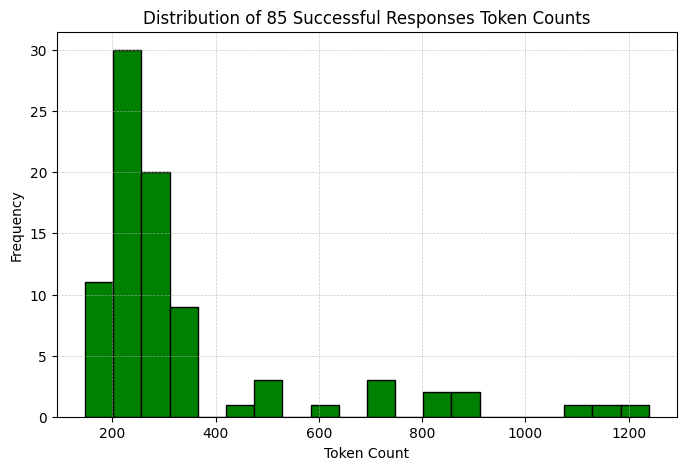

In [55]:
import matplotlib.pyplot as plt

# Check if there are any token counts to plot
if stats['successful_token_counts']:
    plt.figure(figsize=(8, 5))
    plt.hist(stats['successful_token_counts'], bins=20, color='green', edgecolor='black', histtype='bar')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {stats["successful_count"]} Successful Responses Token Counts')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()
else:
    print("No successful token counts data available to plot.")


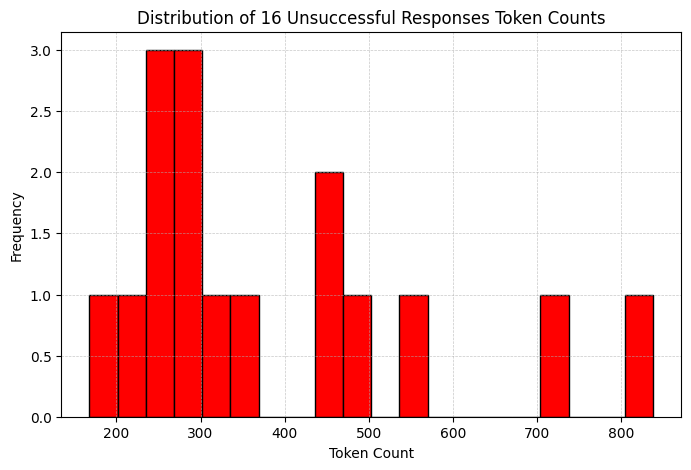

In [56]:
if stats['unsuccessful_token_counts']:
    plt.figure(figsize=(8, 5))
    plt.hist(stats['unsuccessful_token_counts'], bins=20, color='red', edgecolor='black', histtype='bar')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {stats["unsuccessful_count"]} Unsuccessful Responses Token Counts')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()
else:
    print("No unsuccessful token counts data available to plot.")
